In [34]:
# extesnions to store image extensions
import os
import cv2     
from PIL import Image
import tensorflow as tf


In [35]:
data_dir='data'

In [36]:
image_exts=['jpg','png','jpeg','bmp']

In [37]:
image_exts

['jpg', 'png', 'jpeg', 'bmp']

In [38]:
# just to understand the fucntionality of the os
os.listdir('data')

['happy', 'sad']

In [39]:
os.listdir(os.path.join(data_dir,'happy'))
#with the help of this statement we can just get inside a folder which is already in a folder and acess all the file

['-group-students-gathered-together-outdoors-looking-down-camera-sky-395065375.jpg',
 '360_F_225505578_vMIXgtQCpzoOOVX7nJ69Ez7LkYb6Kk56.jpg',
 '360_F_433760081_OTjrp7Dbl1Q6iaFezcd0GxYcF4jiwk4A.jpg',
 '360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg',
 '36d4ffa98d117d79b5a914395262b67c.jpg',
 '65df254481d4ddd0c527a642_10-Common-Traits-Among-Happy-People-1.jpeg',
 'aG90by5qcGc.jpg',
 'aGxvUTg9.jpg',
 'aHdrNmltUFNzdz0.jpg',
 'anBn.jpg',
 'anBn2.jpg',
 'anBn3.jpg',
 'anBn4.jpg',
 'anBn5.jpg',
 'anBn6.jpg',
 'anBn7.jpg',
 'anBn8.jpg',
 'aTk1MDFSV2JBPQ.jpg',
 'aU1LQkprN1pTSHc9.jpg',
 'azFxaz0.jpg',
 'b2909e7d945ff39b659273b7ef7d2e84.jpg',
 'b3IuanBn.jpg',
 'b3RvLmpwZw.jpg',
 'b3RvLmpwZw2.jpg',
 'bHRtYXpBPQ.jpg',
 'bkdzPQ.jpg',
 'bkVZVXpXNXFVPQ.jpg',
 'bUU9.jpg',
 'bVV4cXM9.jpg',
 'by5qcGc.jpg',
 'by5qcGc2.jpg',
 'by5qcGc3.jpg',
 'by5qcGc4.jpg',
 'c281QT0.jpg',
 'celebrating-outside-friendship-community-youth-university-concept_169160-631.jpg',
 'cGc.jpg',
 'cGc10.jpg',
 'cGc2.jpg',
 'cG

In [40]:
#creating a function to remove dodgy images 
from PIL import Image
import os

image_exts = ['jpeg', 'jpg', 'png']

for image_class in os.listdir(data_dir):
    class_folder = os.path.join(data_dir, image_class)

    for image in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image)

        try:
            # Try opening the image with PIL (more reliable than imghdr)
            with Image.open(image_path) as img:
                img.verify()   # verifies integrity

            ext = image.split('.')[-1].lower()

            if ext not in image_exts:
                print(" Wrong extension", image_path)
                os.remove(image_path)

        except Exception as e:
            print("Corrupt image", image_path)
            # os.remove(image_path)   # enable if you want to auto-delete


    
    

In [41]:
# LOADING THE DATA

In [42]:
import pandas as pd
from matplotlib import pyplot as plt

In [44]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 424 files belonging to 2 classes.


In [46]:
# as we have conatined all our images in a single data variable we cant just directly access it like data[0] or data[1]because its not a numpy array..so in order to we have to first convert it into a numpy array
data_iterator=data.as_numpy_iterator()

In [48]:
# its a batch of data from out dadata_iterator
batch=data_iterator.next()


In [49]:
batch

(array([[[[254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          ...,
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ]],
 
         [[254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          ...,
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ]],
 
         [[254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          ...,
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ]],
 
         ...,
 
         [[2

In [50]:
batch[0].shape #IMAGES

(32, 256, 256, 3)

In [52]:
batch[1] #LABEL FOR CLASS 

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int32)

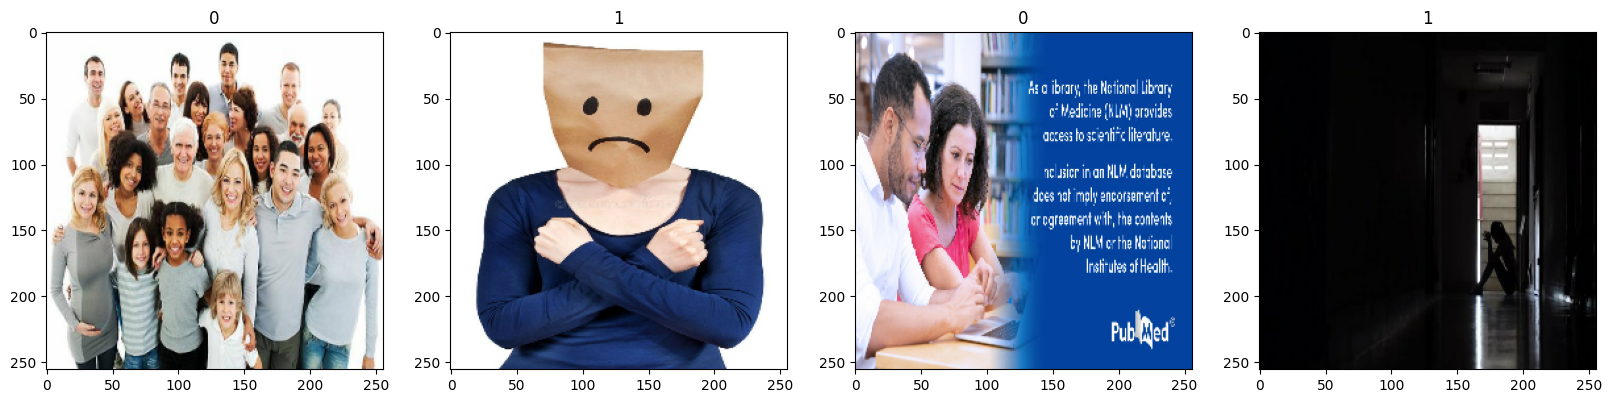

In [54]:
#now lets visualise which label is assigned for which class using %matplotlib
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [56]:
#so this is clear that our model has assigned 
#0 to happy 
#1 to SAD

In [57]:
#PART 2 PREPROCESSING 

In [58]:
#1)SCALING

In [59]:
data=data.map(lambda x,y:(x/255,y))

In [63]:
data.as_numpy_iterator().next()
#this actually performs the above line and shows that now every value is just caled to 0 andn1

(array([[[[0.77254903, 0.76862746, 0.7921569 ],
          [0.77254903, 0.76862746, 0.7921569 ],
          [0.7737745 , 0.76985294, 0.79338235],
          ...,
          [0.75808823, 0.75808823, 0.7894608 ],
          [0.75686276, 0.75686276, 0.7882353 ],
          [0.75686276, 0.75686276, 0.7882353 ]],
 
         [[0.77254903, 0.76862746, 0.7921569 ],
          [0.77254903, 0.76862746, 0.7921569 ],
          [0.7737745 , 0.76985294, 0.79338235],
          ...,
          [0.75808823, 0.75808823, 0.7894608 ],
          [0.75686276, 0.75686276, 0.7882353 ],
          [0.75686276, 0.75686276, 0.7882353 ]],
 
         [[0.77254903, 0.76862746, 0.7921569 ],
          [0.77254903, 0.76862746, 0.7921569 ],
          [0.7737745 , 0.76985294, 0.79338235],
          ...,
          [0.75808823, 0.75808823, 0.7894608 ],
          [0.75686276, 0.75686276, 0.7882353 ],
          [0.75686276, 0.75686276, 0.7882353 ]],
 
         ...,
 
         [[0.827451  , 0.83137256, 0.84705883],
          [0.82745

In [64]:
#2)Split

In [65]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1


In [66]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

MODEL BUILDING

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,Dense

In [72]:
model=Sequential()

In [74]:
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D())

In [76]:
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D())

In [77]:
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPool2D())

In [79]:
model.add(Flatten())

In [80]:
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [81]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
logdir='logs'

In [84]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [86]:
model_history=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 411ms/step - accuracy: 0.9965 - loss: 0.0280 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 395ms/step - accuracy: 0.9965 - loss: 0.0236 - val_accuracy: 1.0000 - val_loss: 0.0148
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 424ms/step - accuracy: 0.9965 - loss: 0.0198 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - accuracy: 0.9931 - loss: 0.0169 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 510ms/step - accuracy: 0.9931 - loss: 0.0211 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 470ms/step - accuracy: 0.9965 - loss: 0.0112 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 391ms/step - accuracy: 0.9965 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 407ms/step - accuracy: 0.9931 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss:

# plot perfomance

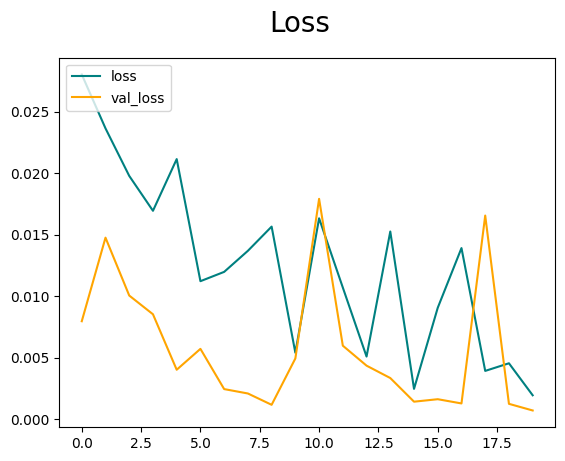

In [87]:
fig = plt.figure()
plt.plot(model_history.history['loss'], color='teal', label='loss')
plt.plot(model_history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [92]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [93]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [94]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


In [95]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# testing on a random picture

In [97]:
import cv2

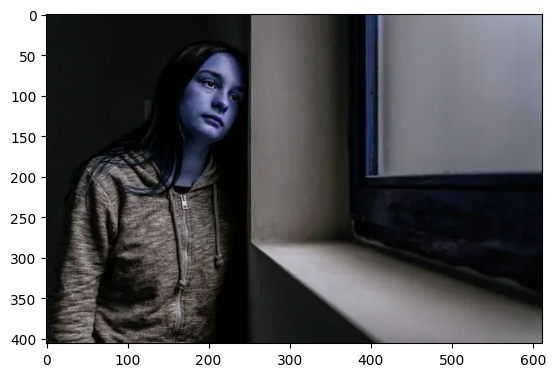

In [107]:
img=cv2.imread('sad-young-girl.jpg')
plt.imshow(img)
plt.show()

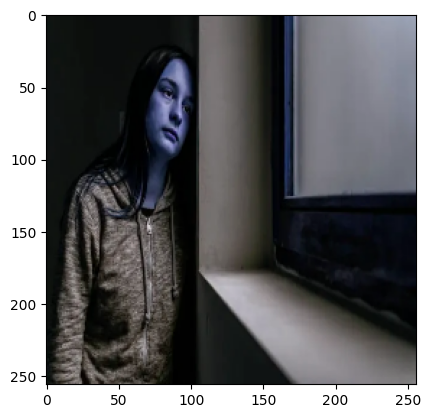

In [108]:
#resizing the image
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [110]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


In [111]:
yhat

array([[0.95784676]], dtype=float32)

In [112]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [113]:
#saving

In [114]:
from tensorflow.keras.models import load_model

In [120]:
model.save("imageclassifier.keras")


In [121]:
from tensorflow.keras.models import load_model

new_model = load_model("imageclassifier.keras")


C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
